## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [3]:
# Determine the number of unique values in each column.
unique_counts = application_df.nunique()

print(unique_counts)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64


In [4]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = application_df['APPLICATION_TYPE'].value_counts()

print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [5]:
# Choose a cutoff value and create a list of application types to be replaced
cutoff_value = 65

# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_type_counts[application_type_counts < cutoff_value].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: count, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df['CLASSIFICATION'].value_counts()

print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts_gt1 = classification_counts[classification_counts > 1]

print(classification_counts_gt1)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df)

application_df_encoded.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,108590,1,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2,1,5000,0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,1,6692,1,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,1,142590,1,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [9]:
# Split our preprocessed data into our features and target arrays
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL'])
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = len(X_train_scaled[0])
hidden_layer1_nodes =80
hidden_layer2_nodes =40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, input_dim=input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_layer2_nodes, activation='sigmoid'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=10, input_dim=input_features, activation='sigmoid'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

c:\Users\realy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         8,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,541 (48.99 KB)

 Trainable params: 12,541 (48.99 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# Train the model
model_history = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.6842 - loss: 0.6116
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - accuracy: 0.7278 - loss: 0.5606
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.7352 - loss: 0.5504
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.7361 - loss: 0.5492
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.7342 - loss: 0.5509
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.7368 - loss: 0.5446
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.7374 - loss: 0.5443
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.7340 - loss: 0.5477
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.7361 - loss: 0.5448
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.7322 - loss: 0.5496
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/step - accuracy: 0.7370 - loss: 0.5442
Epoch 12/100
804/80

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Print the loss and accuracy
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 662us/step - accuracy: 0.7259 - loss: 0.5589
Loss: 0.5589050054550171, Accuracy: 0.7259474992752075


In [15]:
### Version 2 - post feature selection

In [17]:
import tensorflow as tf
import kerastuner as kt  # Import Kerastuner

# Define number of input features
number_input_features = X_train_scaled.shape[1]

# Create a method that creates a new Sequential model with hyperparameter tuning
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow Kerastuner to choose activation function
    activation = hp.Choice('activation', ['relu', 'tanh'])

    # Add the input layer with a hyperparameter for the number of units
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
                                                     min_value=32,
                                                     max_value=128,
                                                     step=32),
                                        activation=activation, input_dim=number_input_features))

    # Add multiple hidden layers with a hyperparameter for the number of layers and units
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int(f'units_{i}',
                                                         min_value=32,
                                                         max_value=128,
                                                         step=32),
                                            activation=activation))

    # Add the output layer
    nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model with binary cross-entropy loss and Adam optimizer
    nn_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

    return nn_model

# Create Hyperband tuner with kt
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)


C:\Users\realy\AppData\Local\Temp\ipykernel_26096\1873533240.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt  # Import Kerastuner


Reloading Tuner from .\untitled_project\tuner0.json


In [18]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=75, validation_split=0.2)


In [19]:
# Get top 3 model hyperparameters and print the values
top_hyperparameters = tuner.get_best_hyperparameters(3)
for idx, hyperparameters in enumerate(top_hyperparameters):
    print(f"Top {idx + 1} Hyperparameters:")
    print(hyperparameters.values)

Top 1 Hyperparameters:
{'activation': 'relu', 'first_units': 32, 'num_layers': 5, 'units_0': 128, 'units_1': 64, 'units_2': 96, 'units_3': 64, 'units_4': 96, 'tuner/epochs': 7, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
Top 2 Hyperparameters:
{'activation': 'relu', 'first_units': 96, 'num_layers': 5, 'units_0': 96, 'units_1': 32, 'units_2': 128, 'units_3': 32, 'units_4': 64, 'tuner/epochs': 3, 'tuner/initial_epoch': 0, 'tuner/bracket': 2, 'tuner/round': 0}
Top 3 Hyperparameters:
{'activation': 'relu', 'first_units': 32, 'num_layers': 4, 'units_0': 64, 'units_1': 128, 'units_2': 64, 'units_3': 64, 'units_4': 64, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [20]:
# Get best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:")
print(best_hyperparameters.values)

Best Hyperparameters:
{'activation': 'relu', 'first_units': 32, 'num_layers': 5, 'units_0': 128, 'units_1': 64, 'units_2': 96, 'units_3': 64, 'units_4': 96, 'tuner/epochs': 7, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}


In [23]:
import pandas as pd

# Read in application df
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN"], axis=1)


In [24]:
app_type_vc = application_df["APPLICATION_TYPE"].value_counts()
print(app_type_vc)


APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


(-10.0, 10.0)

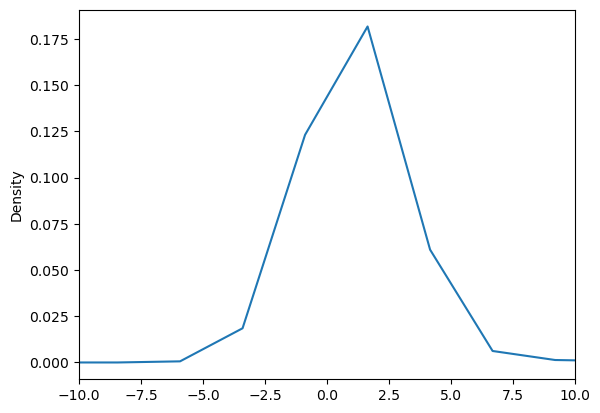

In [25]:
# Choose a cutoff value and create a list of application types to be replaced
import matplotlib.pyplot as plt

# Inspect NAME column
app_name_vc = application_df.NAME.value_counts()

app_name_vc.plot.density()

plt.xlim(left=-10, right=10)

In [26]:
# Find out how many names occur more than 50 times
common_names = app_name_vc[app_name_vc >= 50]

print(common_names)
print(f"There are {common_names.count()} that appear 50 or more times in the dataset.")

NAME
PARENT BOOSTER USA INC                                                1260
TOPS CLUB INC                                                          765
UNITED STATES BOWLING CONGRESS INC                                     700
WASHINGTON STATE UNIVERSITY                                            492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                        408
PTA TEXAS CONGRESS                                                     368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                          331
ALPHA PHI SIGMA                                                        313
TOASTMASTERS INTERNATIONAL                                             293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                      287
LITTLE LEAGUE BASEBALL INC                                             277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                               266
MOMS CLUB                                                              210
INTERNATIONAL ASSOCI

In [27]:
# Replace NAME of observations with less than 50 count with "Other"
names_to_replace = app_name_vc[app_name_vc < 50].index

# Replace in dataframe
for name in names_to_replace:
    application_df['NAME'] = application_df['NAME'].replace(name,"Other")

In [28]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df)

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_l1 = 80
hidden_nodes_l2 = 40
hidden_nodes_l3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l1, activation="relu", input_dim=number_input_features))

# # Add dropout layer
# nn.add(tf.keras.layers.Dropout(.25))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l2, activation="relu"))

# Third layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\realy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 80)             │         8,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,541 (48.99 KB)

 Trainable params: 12,541 (48.99 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Replace 'NAME' of observations with less than 50 count with "Other"
application_types_to_replace = app_type_vc[app_type_vc < 50].index

# Replace in DataFrame
application_df['NAME'] = application_df['NAME'].replace(application_types_to_replace, "Other")

In [31]:
application_df["NAME"].value_counts()


NAME
Other                                                                 24545
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CL

In [32]:
# Convert categorical data to numeric with pd.get_dummies
application_df_encoded = pd.get_dummies(application_df)


In [33]:
# Split our preprocessed data into our features and target arrays
X = application_df_encoded.drop(columns=['IS_SUCCESSFUL', 'STATUS'])
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_l1 = 80
hidden_nodes_l2 = 40
hidden_nodes_l3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l1, activation="relu", input_dim=number_input_features))

# # Add dropout layer
# nn.add(tf.keras.layers.Dropout(.25))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l2, activation="relu"))

# Third layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_l3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 80)             │        13,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,101 (66.80 KB)

 Trainable params: 17,101 (66.80 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=75)

Epoch 1/75
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.7340 - loss: 0.5317
Epoch 2/75
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.7635 - loss: 0.4785
Epoch 3/75
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.7681 - loss: 0.4739
Epoch 4/75
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.7637 - loss: 0.4730
Epoch 5/75
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7708 - loss: 0.4709
Epoch 6/75
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.7690 - loss: 0.4663
Epoch 7/75
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.7754 - loss: 0.4609
Epoch 8/75
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.7714 - loss: 0.4664
Epoch 9/75
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.7680 - loss: 0.4686
Epoch 10/75
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.7677 - loss: 0.4673
Epoch 11/75
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.7758 - loss: 0.4614
Epoch 12/75
804/804 ━━━━━━━━━━

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 653us/step - accuracy: 0.7655 - loss: 0.4948
Loss: 0.49482306838035583, Accuracy: 0.7654810547828674


In [40]:
# Export our model to HDF5 file
# Define the file path
file_path = "your_model.keras"

# Save the model to native Keras format
nn.save(file_path)